In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

## Rosbank ML Competition

Ссылка на соревнование: https://boosters.pro/champ_15

Росбанк – часть ведущей международной финансовой группы Societe Generale, банк включен ЦБ РФ в число 11 системно значимых кредитных организаций России. Инновации неотъемлемый процесс работы Росбанка, поэтому активно развивается направленный анализа больших данных.

- Данные

Датасет, который содержит историю транзакций клиентов за 3 месяца льготного использования банковского продукта

- Задача

Задача бинарной классификации – прогноз оттока клиентов

Колонка cl_id содержит вутренний id клиента. Для каждого уникальнго cl_id следует предсказать продолжит ли клиент пользоваться продуктом (target_flag). Значение 0 соответствует отказу, а значение 1 соответствует продолжению использования

In [2]:
raw_df = pd.read_csv('rosbank_train.csv')
raw_df.head(5)
# target_sum - можно выкинуть, переменная участвует в другой задаче

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0


In [3]:
raw_df['date_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: \
            (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%Y %m %d'))
raw_df['day_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: \
            (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%d'))
raw_df['hour_of_transaction'] = raw_df['TRDATETIME'].apply( lambda x: \
            (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H'))


In [4]:
raw_df.head()

,PERIOD,cl_id,MCC,channel_type,currency,TRDATETIME,amount,trx_category,target_flag,target_sum,date_of_transaction,day_of_transaction,hour_of_transaction
0,01/10/2017,0,5200,NaN,810,21OCT17:00:00:00,5023.0,POS,0,0.0,2017 10 21,21,00
1,01/10/2017,0,6011,NaN,810,12OCT17:12:24:07,20000.0,DEPOSIT,0,0.0,2017 10 12,12,12
2,01/12/2017,0,5921,NaN,810,05DEC17:00:00:00,767.0,POS,0,0.0,2017 12 05,05,00
3,01/10/2017,0,5411,NaN,810,21OCT17:00:00:00,2031.0,POS,0,0.0,2017 10 21,21,00
4,01/10/2017,0,6012,NaN,810,24OCT17:13:14:24,36562.0,C2C_OUT,0,0.0,2017 10 24,24,13


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490513 entries, 0 to 490512
Data columns (total 13 columns):
PERIOD                 490513 non-null object
cl_id                  490513 non-null int64
MCC                    490513 non-null int64
channel_type           487603 non-null object
currency               490513 non-null int64
TRDATETIME             490513 non-null object
amount                 490513 non-null float64
trx_category           490513 non-null object
target_flag            490513 non-null int64
target_sum             490513 non-null float64
date_of_transaction    490513 non-null object
day_of_transaction     490513 non-null object
hour_of_transaction    490513 non-null object
dtypes: float64(2), int64(4), object(7)
memory usage: 48.7+ MB


In [6]:
print("Total clients: ", len(raw_df.cl_id.unique()))

Total clients:  5000


Всего 5000 клиентов, случайным образом возьмем 1000 клиентов для тестирования

In [7]:
raw_df['hour_of_transaction']=pd.to_numeric(raw_df['hour_of_transaction'])
raw_df['day_of_transaction']=pd.to_numeric(raw_df['day_of_transaction'])

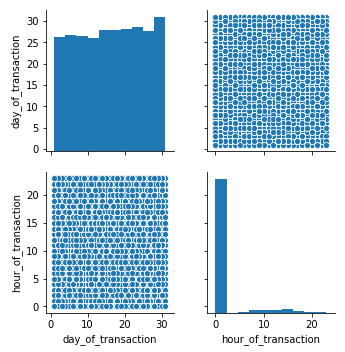

In [8]:
import seaborn as sns
sns.pairplot(raw_df, vars=['day_of_transaction', 'hour_of_transaction'],
                 kind='scatter')

In [ ]:
#пятница, суббота и воскресенье - пиковые дни по транзакциям
#время и час мало где указано. Для большинства операций 00:00. Пожалуй, часы из фичей можно исключить

In [ ]:
#1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, 
#где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test

In [9]:
cl_ids_test = np.random.choice(raw_df.cl_id.unique(), size=1000, replace=False)
cl_ids_test_set = set(cl_ids_test)

In [10]:
# create transactions dataset for train
#MAY BE ids_train????? - нет знак обращения (тильда)
transactions_train = raw_df[~raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in train dataset: ", len(transactions_train))
# create transactions dataset for test
transactions_test = raw_df[raw_df.cl_id.isin(cl_ids_test)].copy()
print("Total transactions in test dataset: ", len(transactions_test))

Total transactions in train dataset:  395277
Total transactions in test dataset:  95236


## Домашняя работа

1. Наборы данных вида Transactions (несколько транзакций на одного клиента) трансформировать в таблицу, где cl_id будут уникальными (соответственно 4000 строк в train и 1000 строк в test
2. Для каждого cl_id будет уникальное целевое событие target_flag, а также уникальный канал привлечения клиента channel_type (клиент привлекается лишь однажды и с самого начала его записи присваивается значение канала привлечения)
3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи, идеи для таких фичей могут быть следующими:

    - общая сумма транзакций по каждой из trx_category
    - общая сумма транзакции по основным вылютам (напр. выделить рубли, доллары и евро - предположительно, это будут самые крупные категории)
    - общая сумма транзакций по категориям MCC кодов (например, выбрать основные/популярные MCC коды). ВНИМАНИ! Некоторые MCC коды из train могут быть не представлены в test. Про MCC коды в целом: http://www.banki.ru/wikibank/mcc-kod/; Справочник MCC кодов: https://mcc-codes.ru/code; Про некоторые категории кэшбека Росбанка: https://mcc-codes.ru/card/rosbank-sverkh-plus;
    - возможные агрегации по времени суток и дням недели - траты в выходные (праздники) или будни, в ночное время или в рабочее и т.д.
4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи
5. **Обязательная часть**: на большом количестве фичей применить Lasso регрессию и посмотреть, какие переменные получают 0 в качестве коэффициентов
6. **Дополнительная часть**: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. **Метрика оценки качества - ROC AUC**(https://en.wikipedia.org/wiki/Receiver_operating_characteristic)
7. Задания принимаются в виде ноутбука с кодов/картинками выполненной обязательной части + указанием места в leaderboard при решении дополнительной

При возникновении вопросов и для отправки домашнего задания - egsachko@gmail.com или http://fb.com/sachkoe
    

In [11]:
raw_df_grouped = raw_df[
    ['cl_id', 'amount', 'MCC']
].groupby(['cl_id', 'MCC']).agg(['sum', 'count'])

# aggregated_dataset = raw_df_grouped.unstack().fillna(0)
aggregated_dataset = raw_df_grouped.unstack()

In [12]:
def transaction_by_day_count(dataset):
    dataset['day_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: \
        (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%w') ) 
    
    tmp_df = dataset.groupby(['cl_id','day_of_transaction'])['day_of_transaction']\
        .size().unstack().fillna(0).reset_index()
    
    old_columns = [old_col for old_col in tmp_df.columns.tolist() \
                   if old_col in dataset['day_of_transaction'].unique()]
    
    tmp_df.rename(columns={old_col: 'day_' + old_col for old_col in old_columns}, inplace=True)
    
    return tmp_df
    
    

def transaction_by_hour_count(dataset):
    dataset['hour_of_transaction'] = dataset['TRDATETIME'].apply( lambda x: \
            (datetime.datetime.strptime(x, '%d%b%y:%H:%M:%S')).strftime('%H') ) 
    tmp_df = dataset.groupby(['cl_id','hour_of_transaction'])['hour_of_transaction']\
        .size().unstack().fillna(0).reset_index()
    
    old_columns = [old_col for old_col in tmp_df.columns.tolist() \
                   if old_col in dataset['hour_of_transaction'].unique()]
    
    tmp_df.rename(columns={old_col: 'hour_' + old_col for old_col in old_columns}, inplace=True)
    
    return tmp_df

In [ ]:
#transaction_by_hour_count(raw_df).head()

In [13]:
#raw_df_grouped.head()

popular_MCC = raw_df[
    ['amount', 'MCC']
#].groupby(['MCC']).agg(['sum', 'count']).reset_index()
].groupby(['MCC']).count().reset_index().sort_values(['amount'], ascending=False).head(10)

popular_MCC.head()

,MCC,amount
158,5411,121640
244,6011,54382
198,5814,41351
196,5812,30027
163,5499,27237


# 3. При агрегации (*pandas.DataFrame.groupby*) по cl_id (или по связке cl_id, channel_type, target_flag) необходимо создавать производные фичи:

In [14]:
import sqlite3

In [15]:
conn=sqlite3.connect('transactions.db')
raw_df.to_sql('test_trans', if_exists='replace', con=conn)

In [16]:
#check=pd.io.sql.read_sql("select date('05 Dec 2000', 'DD Mon YYYY')  from test_trans limit 100", conn)
#5411, 6011, 5814, 5812, 5499
check=pd.io.sql.read_sql("select cl_id, target_flag,  \
    count(distinct date_of_transaction) as nmb_of_days, \
    count(Amount) as count_amt \
    , count(case when MCC=5411 then amount else NULL end) as M5411 \
    , count(case when MCC=6011 then amount else NULL end) as M6011 \
    , count(case when MCC=5814 then amount else NULL end) as M5814 \
    , count(case when MCC=5812 then amount else NULL end) as M5812 \
    , count(case when MCC=5499 then amount else NULL end) as M5499 \
    , count(case when currency=810 then amount else NULL end) as oper_RUR \
    , count(case when currency=840 then amount else NULL end) as oper_USD \
    , count(case when currency=978 then amount else NULL end) as oper_eur \
    , count(case when currency not in (810, 840, 978) then amount else NULL end) as oper_other_cur \
    , case when channel_type='type1'  then 1 else 0 end as channel1 \
    , case when channel_type='type2'  then 1 else 0 end as channel2 \
    , case when channel_type='type3'  then 1 else 0 end as channel3 \
    , case when channel_type='type4'  then 1 else 0 end as channel4 \
    , case when channel_type='type5'  then 1 else 0 end as channel5 \
    from test_trans \
    group by cl_id, target_flag \
    , case when channel_type='type1'  then 1 else 0 end \
    , case when channel_type='type2'  then 1 else 0 end\
    , case when channel_type='type3'  then 1 else 0 end\
    , case when channel_type='type4'  then 1 else 0 end\
    , case when channel_type='type5'  then 1 else 0 end \
    order by 4 desc", conn)
check.head()

,cl_id,target_flag,nmb_of_days,count_amt,M5411,M6011,M5814,M5812,M5499,oper_RUR,oper_USD,oper_eur,oper_other_cur,channel1,channel2,channel3,channel4,channel5
0,2143,0,90,784,79,25,116,168,27,784,0,0,0,0,1,0,0,0
1,5373,0,91,512,52,0,54,29,10,512,0,0,0,1,0,0,0,0
2,5630,0,86,501,56,20,17,8,138,501,0,0,0,1,0,0,0,0
3,4564,1,72,499,65,66,28,34,18,497,0,2,0,1,0,0,0,0
4,1261,1,80,485,62,43,15,153,0,483,0,2,0,0,1,0,0,0


In [17]:
research=pd.io.sql.read_sql("select currency, sum(Amount*(case when currency=978 then 75 \
    when currency=840 then 75 else 1 end))  as sum_amt_RUR, count(distinct amount) \
        from test_trans \
    group by currency order by 3 desc", conn)
research.head()
#978 euro 840 USD

,currency,sum_amt_RUR,count(distinct amount)
0,810,2.572996e+09,83276
1,978,4.538389e+07,2703
2,840,2.116080e+07,1307
3,933,2.439989e+04,429
4,985,4.868475e+04,354


In [ ]:
research=pd.io.sql.read_sql("select channel_type, count(distinct amount), sum(amount) from test_trans  group by channel_type order by 3 desc", conn)
research.head()

In [18]:
check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 18 columns):
cl_id             5000 non-null int64
target_flag       5000 non-null int64
nmb_of_days       5000 non-null int64
count_amt         5000 non-null int64
M5411             5000 non-null int64
M6011             5000 non-null int64
M5814             5000 non-null int64
M5812             5000 non-null int64
M5499             5000 non-null int64
oper_RUR          5000 non-null int64
oper_USD          5000 non-null int64
oper_eur          5000 non-null int64
oper_other_cur    5000 non-null int64
channel1          5000 non-null int64
channel2          5000 non-null int64
channel3          5000 non-null int64
channel4          5000 non-null int64
channel5          5000 non-null int64
dtypes: int64(18)
memory usage: 703.2 KB


In [19]:
check.head()

,cl_id,target_flag,nmb_of_days,count_amt,M5411,M6011,M5814,M5812,M5499,oper_RUR,oper_USD,oper_eur,oper_other_cur,channel1,channel2,channel3,channel4,channel5
0,2143,0,90,784,79,25,116,168,27,784,0,0,0,0,1,0,0,0
1,5373,0,91,512,52,0,54,29,10,512,0,0,0,1,0,0,0,0
2,5630,0,86,501,56,20,17,8,138,501,0,0,0,1,0,0,0,0
3,4564,1,72,499,65,66,28,34,18,497,0,2,0,1,0,0,0,0
4,1261,1,80,485,62,43,15,153,0,483,0,2,0,0,1,0,0,0


In [20]:
all_factors=pd.merge(transaction_by_hour_count(raw_df), transaction_by_day_count(raw_df), on='cl_id', how='inner')
all_factors=pd.merge(check, all_factors, on='cl_id', how='inner')

In [21]:
all_factors.head()

,cl_id,target_flag,nmb_of_days,count_amt,M5411,M6011,M5814,M5812,M5499,oper_RUR,...,hour_21,hour_22,hour_23,day_0,day_1,day_2,day_3,day_4,day_5,day_6
0,2143,0,90,784,79,25,116,168,27,784,...,0.0,1.0,2.0,103.0,116.0,119.0,114.0,111.0,104.0,117.0
1,5373,0,91,512,52,0,54,29,10,512,...,0.0,0.0,1.0,77.0,78.0,67.0,72.0,77.0,70.0,71.0
2,5630,0,86,501,56,20,17,8,138,501,...,3.0,1.0,0.0,72.0,67.0,76.0,56.0,74.0,71.0,85.0
3,4564,1,72,499,65,66,28,34,18,497,...,5.0,1.0,0.0,60.0,63.0,81.0,73.0,53.0,94.0,75.0
4,1261,1,80,485,62,43,15,153,0,483,...,0.0,0.0,0.0,81.0,103.0,81.0,51.0,35.0,46.0,88.0


# 4. **Обязательная часть**: провести первичный анализ данных - посмотреть распределения признаков, выделить самые популярные MCC, помотреть активность клиентов по дням недели/времени, какие категории транзакции (trx_category) наиболее популярны и т.д. 
    Получить инсайты, которые в дальнейшем помогут вам правильно подготовить фичи

In [22]:
corr_matrix = all_factors.corr()
corr_matrix["target_flag"].sort_values(ascending=False)

#corr with count of operations per MCC M5814 - 0.191623, M5812 - 0.183713, M6011 - 0.179563, M5411 - 0.120854
#M5499 - 0.103789

target_flag       1.000000
channel2          0.363413
nmb_of_days       0.347306
count_amt         0.250618
hour_00           0.247765
oper_RUR          0.243925
day_5             0.235032
day_3             0.230573
day_4             0.226871
day_2             0.222035
day_1             0.221452
day_6             0.218655
day_0             0.217476
M5814             0.191623
M5812             0.183713
M6011             0.179563
M5411             0.120854
M5499             0.103789
oper_other_cur    0.091027
hour_13           0.082613
hour_14           0.075396
hour_03           0.068781
hour_09           0.062148
hour_05           0.059685
hour_04           0.058542
hour_17           0.058030
hour_02           0.052907
hour_23           0.050618
hour_07           0.049283
hour_01           0.049274
oper_eur          0.048252
hour_08           0.043922
hour_11           0.043702
hour_15           0.043199
hour_18           0.042447
hour_12           0.042276
hour_06           0.041113
h

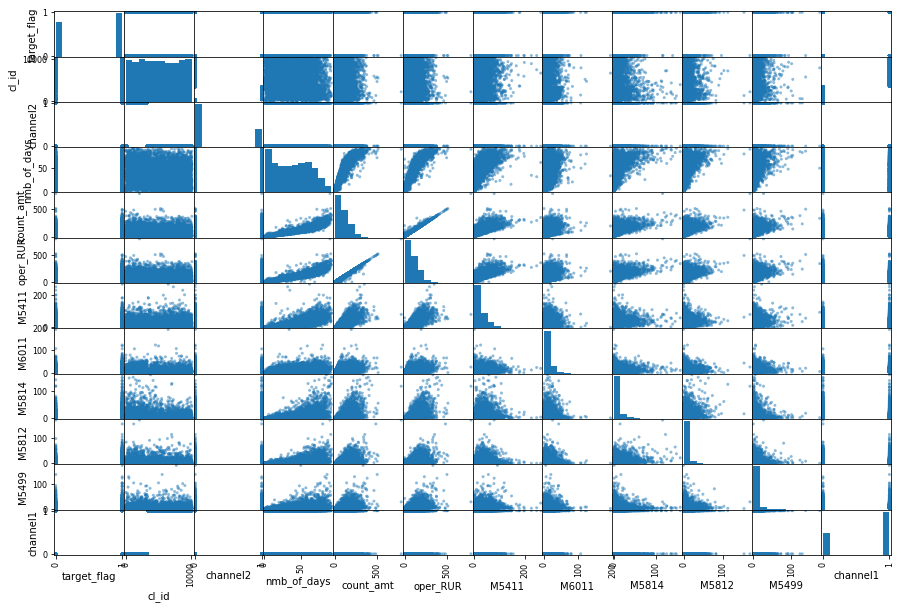

In [23]:
from pandas.plotting import scatter_matrix

attributes = ["target_flag", "cl_id", "channel2", "nmb_of_days", "count_amt", "oper_RUR", \
              "M5411", "M6011", "M5814", "M5812", "M5499", "channel1"]
_ = scatter_matrix(all_factors[attributes], figsize=(15, 10))

#"cl_id", "target_flag", "channel_type", "nmb_of_days", "sum_amt", "M5411', 'M6011", "M5814", "M5812", "M5499", "hour_21", "hour_22", "hour_23", "day_0", "day_1", "day_2", "day_3", "day_4", "day_5","day_6

In [ ]:
#среди признаков есть коррелирующие между собой (линейно зависимые), 
#например "число операций" и "число операций в рублях". 
#Будем надеяться, что для Лассо как для нелинейной модели это не страшно

# 5. **Обязательная часть**: на большом количестве фичей применить Lasso регрессию и посмотреть, какие переменные получают 0 в качестве коэффициентов

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
#all_factors ['cl_id'] in cl_ids_test_set]
#x_train=pd.merge(all_factors, cl_ids_test, on='cl_id', how='inner')
x_train=all_factors[~all_factors.cl_id.isin(cl_ids_test)].drop("target_flag", axis=1)
#x_train=all_factors[~all_factors.cl_id.isin(cl_ids_test)].drop("target_flag", axis=1)

y_train=all_factors[~all_factors.cl_id.isin(cl_ids_test)]['target_flag'].copy()
x_test=all_factors[all_factors.cl_id.isin(cl_ids_test)].drop("target_flag", axis=1)
y_test=all_factors[all_factors.cl_id.isin(cl_ids_test)]['target_flag'].copy()

In [26]:
alpha_lasso = [1e-8,1e-7, 1e-6, 1e-5, 1e-4,1e-3, 1e-2,1e-1, 1]

In [27]:
from sklearn import linear_model
#lassoreg = linear_model.Lasso(alpha=0.001, normalize=True, max_iter=1000)
#lassoreg.fit(x_train, y_train)


In [28]:
from sklearn.linear_model import Lasso
from sklearn.metrics import roc_auc_score

def lasso_regression(X, Y, X_t, Y_t, alpha):
    # fit
    lassoreg = Lasso(alpha=alpha, normalize=True, max_iter=1e5)
    lassoreg.fit(X, Y)
    Y_pred_tr = lassoreg.predict(X)
    Y_pred_test = lassoreg.predict(X_t)
    
    
    # format
    RAS=roc_auc_score(Y, Y_pred_tr)
    ret = [RAS]
    ret.append(roc_auc_score(Y_t, Y_pred_test))
    #ret.append(lassoreg.score(X, Y))
    #ret.append(lassoreg.score(X_t, Y_t))
    ret.append(lassoreg.intercept_)
    #l=[1,2,3]
    for s in range(len(lassoreg.coef_)):
        ret.append(lassoreg.coef_[s])
    #ret.append(lassoreg.coef_)
    
    #ret = np.array([R2], roc_auc_score(Y_t, Y_pred_test), roc_auc_score(Y_t, Y_pred_test), \
    #              lassoreg.coef_)
    
    #ret = np.array([[R2], lassoreg.coef_]).reshape(20)

    #ret.extend(roc_auc_score(Y_t, Y_pred_test))
    #ret.extend(lassoreg.score(X, Y))
    #ret.extend(lassoreg.score(X_t, Y_t))
    #ret.extend([lassoreg.intercept_])
    #ret.extend(lassoreg.coef_)
    
    return ret

In [ ]:
#lasso_regression(x_train, y_train, x_test, y_test, alpha=0.001)

In [30]:
#Initialize the dataframe to store coefficients
#col = ['rss','intercept'] + ['coef_x_%d'%i for i in range(1,16)]
col = ['roc_auc_train', 'roc_auc_test',\
       #'R2_tr', 'R2_test', \
       'intercept'] + list(x_train) #.columns
ind = ['alpha_%.2g'%alpha_lasso[i] for i in range(0,8)]
coef_matrix_lasso = pd.DataFrame(index=ind, columns=col)

In [31]:
#coef_matrix_lasso
for i in range(8):
    coef_matrix_lasso.iloc[i, ] = lasso_regression(x_train, y_train, x_test, y_test, alpha_lasso[i])

/home/arseny/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Дополнительная часть: с отобранными фичами и полученными компонентами обучить модель (тип алгоритма на свой вкус, можно начать с линейной) и померить качество на локальном тестовом наборе данных (локальная валидация), который создается в этом ноутбуке. Метрика оценки качества - ROC AUC

In [32]:
transposed=coef_matrix_lasso.T
transposed.sort_values(by='alpha_1e-06', ascending=False)

,alpha_1e-08,alpha_1e-07,alpha_1e-06,alpha_1e-05,alpha_0.0001,alpha_0.001,alpha_0.01,alpha_0.1
roc_auc_train,0.811491,0.811486,0.811467,0.810907,0.804781,0.783986,0.5,0.5
roc_auc_test,0.79039,0.790394,0.790378,0.789704,0.791427,0.782822,0.5,0.5
channel2,0.361573,0.36011,0.345494,0.204333,0.0996212,0.0627641,0,0
channel1,0.302399,0.300856,0.285449,0.136493,0,-0,-0,-0
intercept,0.206536,0.208003,0.222651,0.364123,0.485227,0.561638,0.55525,0.55525
channel4,0.219162,0.217665,0.20271,0.0582626,-0,-0,0,0
channel3,0.175955,0.174409,0.158975,0.00951286,-0.036535,-0,-0,-0
channel5,0.15761,0.156125,0.141288,0,-0.0287604,-0,0,0
hour_01,0.0342313,0.0342138,0.0340057,0.0318585,0.0150724,0,0,0
hour_23,0.0262992,0.0262841,0.026099,0.0242246,0.00807693,0,0,0


In [ ]:
#На мой взгляд неплоха модель Лассо с alpha_1e-06, т.к. ROC_AUC 0,8 на трэйне и на тесте (если верно вычислен)
#Из-за малости альфа, модель должна быть по коээфициентам близка к линейной

#ненулевые положительные коэффициенты большие 0.01 у канала клиента, 
#часов ночной активности (хотя часы для большей части транзакций отсутствуют)
#, количества дней использования продукта

#при увеличении альфа, модель превращается в константу - 0,5. Коэффициенты перед фичами обнуляются 

In [ ]:
#import seaborn as sns
#fig, ax = plt.subplots(figsize=(11.7, 18.27) )
#sns.set_context("talk")
#sns.heatmap(transposed, annot=True, fmt='%.3g')